In [73]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [74]:
dataset = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/'

In [75]:
dataset_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest',
    horizontal_flip=True,
    rescale=1/255.0,
    validation_split=0.2
)

In [76]:
train_data = dataset_generator.flow_from_directory(
    dataset,
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='training'
)

test_data = dataset_generator.flow_from_directory(
    dataset,
    target_size=(32, 32),
    color_mode='rgb',
    class_mode='categorical',
    batch_size=32,
    subset='validation'
)

Found 48000 images belonging to 10 classes.
Found 12000 images belonging to 10 classes.


In [77]:
# model
model = Sequential()

model.add(Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 2, 2, 128)       

In [83]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Can also be 'val_accuracy'
    patience=5,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restores model weights from the epoch with the best value of the monitored quantity
)

history = model.fit(
    train_data,
    steps_per_epoch=(len(train_data)),
    epochs=100,
    validation_data=(test_data),
    validation_steps=(len(test_data)),
    callbacks=[early_stopping]
)

Epoch 1/100
1500/1500 [==============================] - 47s 31ms/step - loss: 0.8807 - accuracy: 0.7008 - val_loss: 0.8833 - val_accuracy: 0.6975
Epoch 2/100
1500/1500 [==============================] - 46s 31ms/step - loss: 0.8814 - accuracy: 0.7015 - val_loss: 0.9076 - val_accuracy: 0.6892
Epoch 3/100
1500/1500 [==============================] - 46s 31ms/step - loss: 0.8804 - accuracy: 0.7023 - val_loss: 0.8471 - val_accuracy: 0.7097
Epoch 4/100
1500/1500 [==============================] - 48s 32ms/step - loss: 0.8826 - accuracy: 0.7020 - val_loss: 0.8712 - val_accuracy: 0.7057
Epoch 5/100
1500/1500 [==============================] - 46s 31ms/step - loss: 0.8818 - accuracy: 0.7031 - val_loss: 0.8889 - val_accuracy: 0.6985
Epoch 6/100
1500/1500 [==============================] - 47s 31ms/step - loss: 0.8720 - accuracy: 0.6999 - val_loss: 0.8903 - val_accuracy: 0.6919
Epoch 7/100
1500/1500 [==============================] - 46s 31ms/step - loss: 0.8733 - accuracy: 0.7051 - val_loss: 0

In [86]:
model.evaluate(test_data)

375/375 [==============================] - 9s 25ms/step - loss: 0.8374 - accuracy: 0.7109


[0.8373835682868958, 0.7109166383743286]

In [122]:
labels = [
    'airplane',
    'automobile',
    'bird',
    'cat',
    'deer',
    'dog',
    'frog',
    'horse',
    'ship',
    'truck'
]


def load_image_process(image_path):
    image = load_img(image_path, target_size=(32,32,3))
    image_arr = img_to_array(image)
    image_arr = image_arr / 255.0
    image_arr = image_arr.reshape(1,32,32,3)
    return image_arr

def process_display(image_path):
    processed_image = load_image_process(image_path)
    prediction = model.predict(processed_image)

    index = np.argmax(prediction)
    class_label = labels[index]

    plt.figure(figsize=(3,3))
    plt.title(f'prediction : {class_label}')
    plt.imshow(load_img(image_path, target_size=(32,32,3)))
    plt.axis('off')
    plt.show()

1/1 [==============================] - 0s 36ms/step


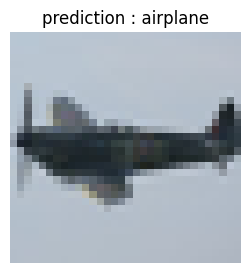

In [123]:
image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/0/image_0.png' #plane
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/1/image_1.png' #automobile
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/2/image_2.png' #bird
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/3/image_3.png' #cat--  
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/4/image_4.png' #deer---
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/5/image_5.png' #dog--
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/6/image_6.png' #frog
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/7/image_7.png' #horse
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/8/image_8.png' #ship
# image = 'datasets/4_CIFAR 10_images_dataset/cifar10_dataset/9/image_9.png' #truck
process_display(image)